# Excercise 5: Canonical Analysis

## 1 Init and EDA

In [47]:
import pandas as pd
data = pd.read_csv("../Data/districts_cr.csv", encoding='Windows-1250', index_col="Unnamed: 0")
data.describe()

Earning99     Unempl    Unempl2    Unempl3  BuyingPower    X.Progre  \
count     77.000000  77.000000  77.000000  77.000000    77.000000   77.000000   
mean   11625.116883   8.890909  12.089610  34.825907    95.779221  236.394805   
std     1183.180148   4.098979  11.324003   7.958741     8.028933   11.526011   
min    10042.000000   2.800000   0.800000  12.839506    83.000000  215.500000   
25%    10925.000000   6.000000   4.500000  30.804810    90.000000  229.400000   
50%    11326.000000   7.900000   8.000000  35.481055    95.000000  234.900000   
75%    11956.000000  11.300000  15.800000  39.307787    99.000000  243.600000   
max    17437.000000  21.500000  56.600000  53.784541   135.000000  278.600000   

          Enterpr      Lifex    Divorce  Abortion        Pop       Crime  \
count   77.000000  77.000000  77.000000  77.00000  77.000000   77.000000   
mean   150.922078  72.216234  52.991723  51.77013  32.881818   33.468976   
std     19.438003   0.858872   9.461625   9.44661  14.584407   14.022319   
min    108.000000  69.700000  37.642046  37.70000   0.000000   16.566907   
25%    137.000000  71.850000  45.840708  44.70000  23.500000   24.548244   
50%    149.000000  72.350000  51.632047  50.30000  35.100000   29.373783   
75%    161.000000  72.850000  57.434402  56.70000  44.100000   39.463535   
max    223.000000  73.750000  82.432432  84.00000  59.100000  100.981444   

           Grow.       Migr      Pop65  
count  77.000000  77.000000  77.000000  
mean    0.001469   1.017187  13.527466  
std     1.775340   1.755597   1.418252  
min    -3.626882  -1.503942   9.609388  
25%    -0.978749   0.066833  12.664899  
50%     0.111987   0.782924  13.688415  
75%     0.644199   1.389803  14.686678  
max     8.105023  11.580121  16.339991

In [48]:
econ_cols = data.columns[:7]
demo_cols = data.columns[7:]

In [50]:
data.columns

Index(['Earning99', 'Unempl', 'Unempl2', 'Unempl3', 'BuyingPower', 'X.Progre',
       'Enterpr', 'Lifex', 'Divorce', 'Abortion', 'Pop', 'Crime', 'Grow.',
       'Migr', 'Pop65'],
      dtype='object')

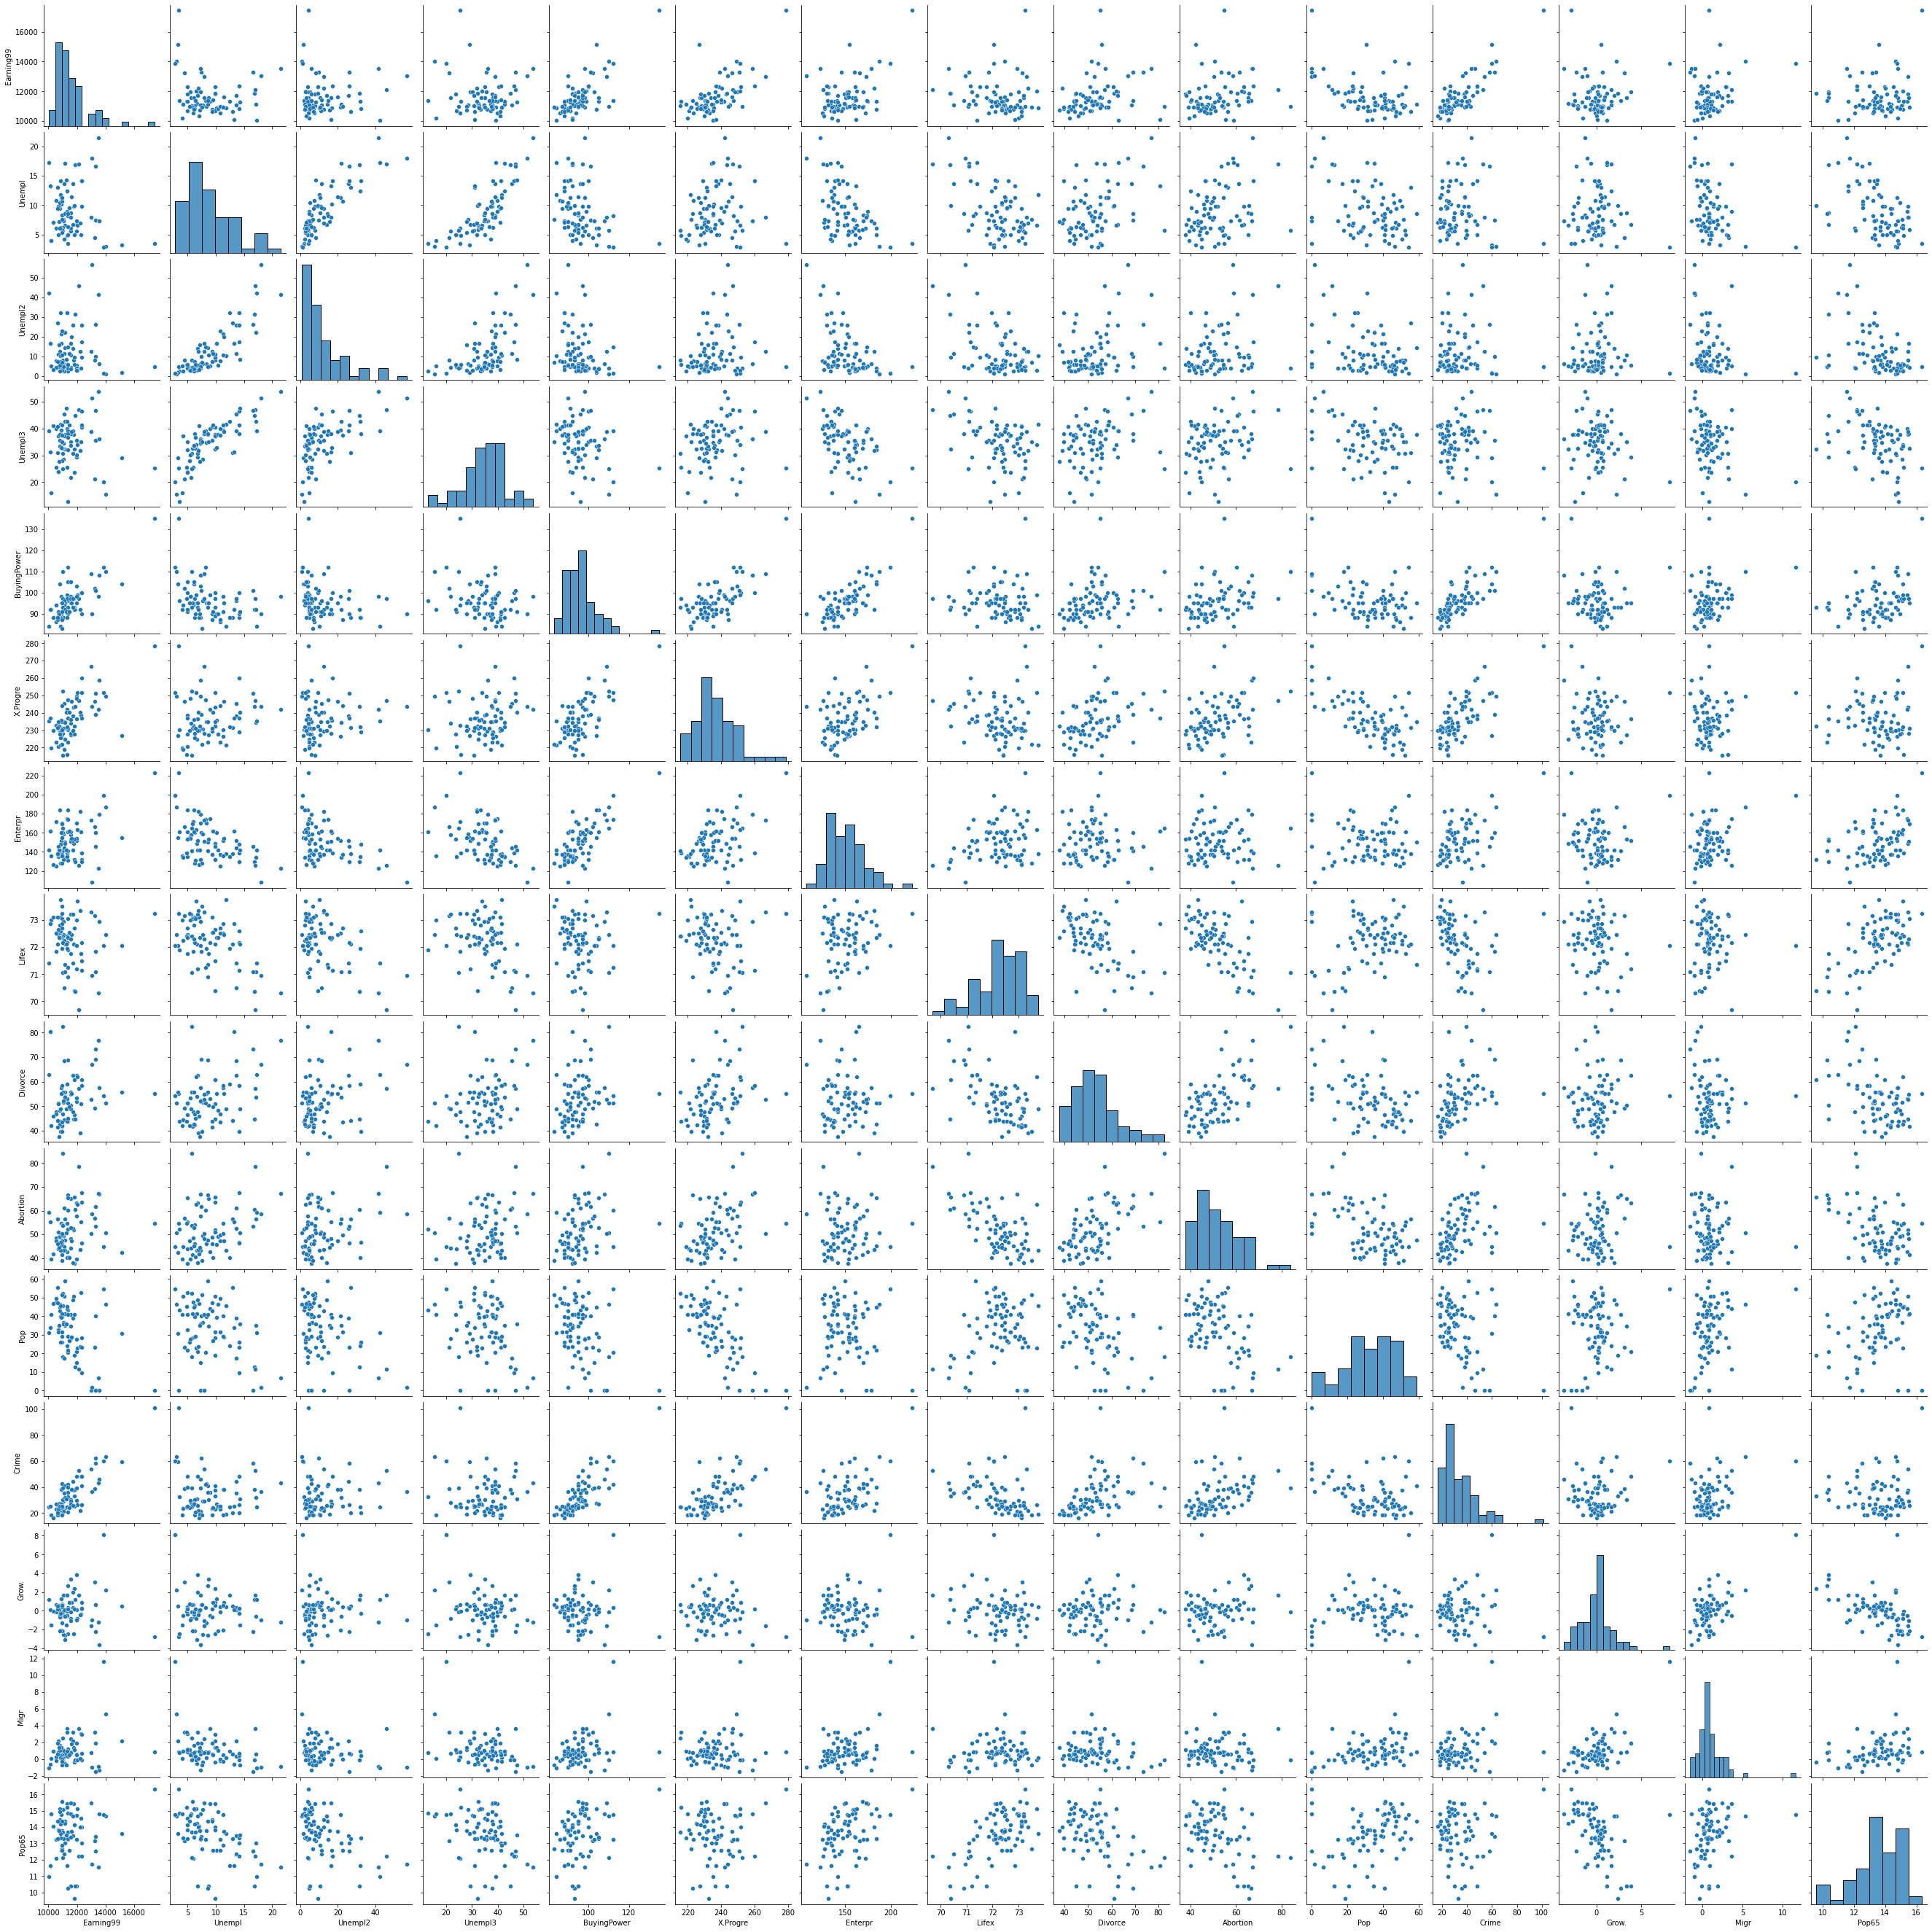

In [49]:
import seaborn as sns
sns.pairplot(data)

In [61]:
from scipy import stats
import numpy as np

data = data.drop(data[np.any(stats.zscore(data) > 3, axis=1)].index)

## Outlier Detection

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_ss = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_ss.index = data.index

data_ss.head(15)

Earning99    Unempl   Unempl2   Unempl3  BuyingPower  \
Benešov            -0.140119 -1.452322 -0.950751 -3.035261     0.182739   
Beroun              0.889686 -1.040856 -0.784070  0.043590     0.824555   
Kladno              0.911620  0.275835 -0.211101  0.787573     0.824555   
Kolín               0.339140  0.275835 -0.356948  0.418310     0.343193   
Kutná Hora         -0.610605  0.687300  1.039012  0.621920     0.503647   
Mělník              1.979809 -0.382511 -0.169431  0.091460     0.985009   
Mladá Boleslav      4.025162 -1.534615 -1.002840 -0.787060     1.466370   
Nymburk            -0.170827  0.028955 -0.679894  0.707226     0.664101   
Praha-východ        2.774920 -1.589477 -1.107016 -2.683597     2.429093   
Příbram            -0.575511 -0.135631 -0.554882 -0.003845     0.022285   
Rakovník           -0.380297 -0.053338  0.309779  0.402826     0.022285   
České Budějovice    1.933748 -1.205443 -0.346530 -1.875178     1.145462   
Český Krumlov       0.100059 -0.025907 -0.096508  0.015028     0.022285   
Jindřichův Hradec  -0.883684 -1.068287 -0.700729 -1.493900    -0.619530   
Pelhřimov          -1.395845 -1.315167 -0.679894 -2.609427    -0.459076   

                   X.Progre   Enterpr     Lifex   Divorce  Abortion       Pop  \
Benešov           -0.494639  0.686745 -0.445769 -0.952671  0.142577  0.706386   
Beroun             0.350077  0.686745 -0.629171 -0.134865  0.478583  1.408265   
Kladno             1.602586 -1.130649 -0.934841  1.031923  1.440255 -0.440771   
Kolín              0.767580 -0.065280 -0.201233 -0.862411  0.084645  1.257323   
Kutná Hora        -0.834467  0.122726  0.287839  0.670434  0.397478  0.457332   
Mělník             0.369496  0.624076 -0.506903  2.041380  1.220113  0.464879   
Mladá Boleslav    -0.824757  0.310733 -0.262367  0.439624 -1.004477 -0.236999   
Nymburk            0.641358  1.564107 -0.140099  0.130562 -0.981305  0.759216   
Praha-východ       1.369561  2.316132  0.226705 -0.070023 -0.065978  0.940345   
Příbram           -0.028589  1.250764 -0.384635  0.371637 -0.598953  0.419597   
Rakovník          -0.028589 -0.002611 -1.118244  0.425386 -0.401984  1.891278   
České Budějovice   1.097699  1.000089  1.082582 -0.317775  0.652379 -0.818125   
Český Krumlov     -0.756792  0.185395 -0.629171 -0.176865  1.637224  0.049790   
Jindřichův Hradec -1.417029 -0.942642  0.226705 -0.080527 -0.842268 -0.108699   
Pelhřimov         -1.484995 -0.879974  0.899180 -1.180100 -1.340483  0.510162   

                      Crime     Grow.      Migr     Pop65  
Benešov            0.046898 -1.607527 -0.129182  0.957246  
Beroun             1.413776 -0.197910  1.651036  0.719793  
Kladno             0.806253  0.597160  1.595477  0.317391  
Kolín              0.496396 -1.643044  0.333742  1.386313  
Kutná Hora         0.541633 -1.340512 -0.389433  0.890769  
Mělník             2.662604  0.444775  0.728204 -0.087643  
Mladá Boleslav     2.427155  0.366428  0.953029  0.030574  
Nymburk            0.356061 -0.306073  2.168141  1.382699  
Praha-východ       2.752360  1.482643  3.524106  0.827628  
Příbram            0.957875 -0.830673 -0.601833  0.155768  
Rakovník           0.808573 -1.744047 -0.113458  0.602882  
České Budějovice   0.597719  2.065535  1.825931 -0.272556  
Český Krumlov     -0.151984  2.263539 -0.071888 -2.317079  
Jindřichův Hradec -0.614435  0.317236 -0.074353  0.199693  
Pelhřimov         -1.165707 -1.015860 -0.714321  0.928490

## 2 Checking the CCA appropriateness

<AxesSubplot:>

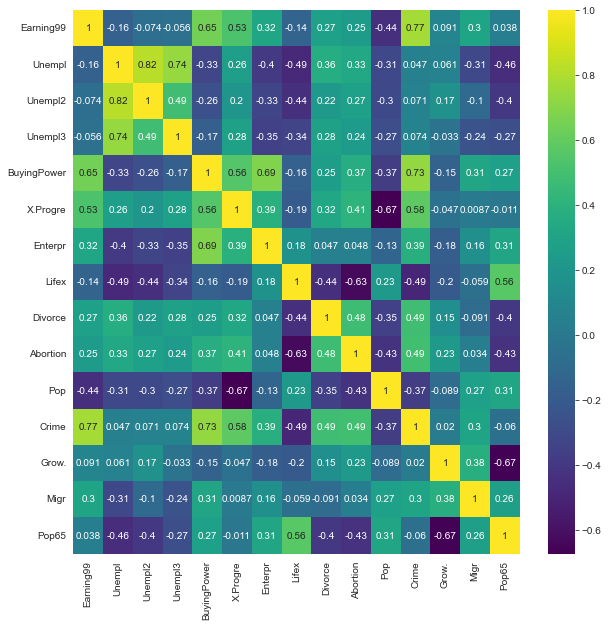

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(data_ss.corr(), annot=True, cmap='viridis')

We can see that many variables are highly positively or negatively correlated. Hence it is appropriate to use the CCA

In [65]:
from plotly import express as px
px.violin(data_ss.reset_index().melt(id_vars='index'), x='variable', y='value', color='variable', points='all', box=True)

## 3 Canonical Analysis

In [72]:
from sklearn.cross_decomposition import CCA
ca = CCA(n_components=2)
# ca.fit(data_ss[demo_cols], data_ss[econ_cols])

demo_ca, econ_ca = ca.fit_transform(data[demo_cols], data[econ_cols])

In [97]:
ca_df = pd.DataFrame(pd.concat([pd.DataFrame(demo_ca, columns=['demo_1', 'demo_2']),
                        pd.DataFrame(econ_ca, columns=['econ_1', 'econ_2'])], axis=1))
ca_df

demo_1    demo_2    econ_1    econ_2
0  -0.167003 -0.304623 -0.422170  0.500069
1   0.751903  0.316648  0.885359  0.649868
2   1.154380 -0.656858  1.716516 -0.581776
3   0.086536 -0.001150  0.667176 -0.232061
4   0.373780 -0.070192 -0.034570 -0.801874
..       ...       ...       ...       ...
67  2.500097 -0.619013  2.815138 -0.858938
68 -0.327646 -0.207716 -0.275610 -0.622603
69 -0.902401 -0.266273 -0.798574 -0.511614
70 -0.555587  0.340307 -0.384810  0.649076
71 -0.933373 -0.241362 -0.927848 -0.763823

[72 rows x 4 columns]

<AxesSubplot:>

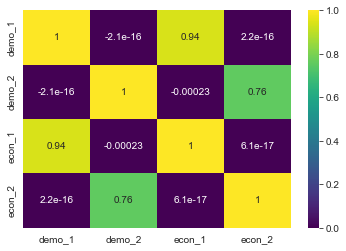

In [101]:
sns.heatmap(ca_df.corr(), annot=True, cmap='viridis')

In [102]:
pd.DataFrame(ca.coef_)

0         1         2         3         4         5         6
0  414.449903 -3.262131 -6.192984 -4.693819  0.820581 -0.921634  8.186028
1 -132.306338  1.039918  1.974089  1.496207 -0.262831  0.291911 -2.611370
2  -40.953637  0.872872  1.709901  1.297874  0.247686  0.958173 -1.517839
3 -250.447700 -0.405653 -0.998072 -0.764652 -1.915352 -3.186822 -1.885845
4  722.060505 -2.091760 -3.626639 -2.736350  3.574491  4.051193  9.636765
5  -30.519826  0.695567  1.364168  1.035506  0.211503  0.785058 -1.189186
6  168.270854 -1.106621 -2.079970 -1.575711  0.463255 -0.031090  3.043090
7  -90.795853  2.336178  4.590625  3.484937  0.788595  2.755877 -3.881479

In [112]:
ca.x_weights_

array([[ 0.07472672,  0.66213204,  0.49740571],
       [-0.02413034, -0.21101232, -0.30656866],
       [ 0.09606253, -0.20175284,  0.17723841],
       [-0.49179212,  0.18846853,  0.3570059 ],
       [ 0.80506375,  0.26420964, -0.10000459],
       [ 0.08005889, -0.16151443,  0.36479502],
       [ 0.07127245,  0.2148902 , -0.07680523],
       [ 0.28832154, -0.54658844,  0.59225094]])

In [113]:
ca.y_weights_

array([[ 0.56126284,  0.56484861, -0.50045383],
       [ 0.13605297, -0.59542489, -0.71472317],
       [ 0.14561453,  0.16581723,  0.08743188],
       [-0.02766951,  0.10847525,  0.05408067],
       [ 0.72648532, -0.39191171,  0.37583272],
       [ 0.32837292,  0.1759157 ,  0.23452174],
       [-0.09431183,  0.32033092, -0.17859737]])

In [88]:
np.sum(ca.y_weights_[:,:])

-0.8136920511431025

In [95]:
ca.x_scores_

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:526: FutureWarning:

Attribute `x_scores_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). Use est.transform(X) on the training data instead.



array([[-1.67002571e-01, -3.04623292e-01,  6.33944546e-01,
         6.25087885e-01,  3.19035147e-01, -4.00464029e-01,
         1.12067703e-02],
       [ 7.51902949e-01,  3.16648340e-01,  3.53031717e-01,
         1.48373166e+00,  1.40079308e+00, -6.21846265e-02,
         5.04773739e-01],
       [ 1.15437984e+00, -6.56857885e-01,  8.78873746e-01,
        -1.59803272e-01,  9.26684806e-01,  1.49013004e-01,
         2.10075952e-01],
       [ 8.65360342e-02, -1.14987780e-03,  8.10799836e-01,
         1.23437954e+00,  4.05265747e-01, -2.64352075e-01,
         8.23851559e-02],
       [ 3.73779864e-01, -7.01916809e-02,  4.45619393e-01,
         1.24747800e+00, -9.49141429e-01, -1.33815308e-01,
         2.00233025e-01],
       [ 1.99326274e+00,  3.62632251e-01, -2.29485428e-01,
         2.10740468e+00, -3.17711837e-01,  6.75697658e-01,
         4.81043364e-01],
       [ 2.03565226e+00,  1.11757466e+00, -1.13689964e+00,
         7.85502453e-01,  7.65419498e-01,  1.52894477e-01,
        -1.0879938